# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv') 

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges') 

/Users/sanail/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


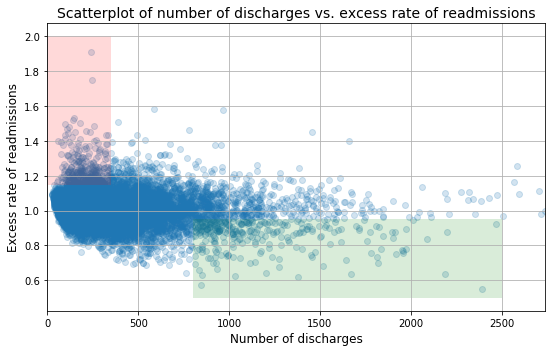

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]] 
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not? 
I do not agree with the analysis and recommendations above for the following reasons: 

A. Initial observations from the plot above. 
According to the graph, it actually does not look like there is a trendline that decreases as the number of discharges increases. Because there are no counts, the red area actually does not tell us that there is a greater excess rate of readmissions when the number of discharges is low. "In Excess" is denoted by a ratio that is greater than 1 and this is not what the red box denotes. The green box actually shows the opposite. There are far more observations that are below the excess 1.0 line when the number of discharges is smaller. 

B. Statistics

In [18]:
#In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have 
# excess readmission rate greater than 1 
clean_hospital_read_df.head() 

data = clean_hospital_read_df 
low_dis = data[data['Number of Discharges'] < 100] 
high_dis = data[data['Number of Discharges'] > 1000] 

low_mean = np.mean(low_dis["Excess Readmission Ratio"])
low_percent = sum(low_dis["Excess Readmission Ratio"] > 1) / len(low_dis)

print('The mean excess readmission rate is', low_mean)
print('The percentage of hospitals that have an excess readmission rate greater than 1 is', low_percent) 

The mean excess readmission rate is 1.0226183501683506
The percentage of hospitals that have an excess readmission rate greater than 1 is 0.5918045705279747


In [19]:
# In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have 
# excess readmission rate greater than 1

high_mean = np.mean(high_dis["Excess Readmission Ratio"])
high_percent = sum(high_dis["Excess Readmission Ratio"] > 1) / len(high_dis)

print('The mean excess readmission rate is', high_mean)
print('The percentage of hospitals that have an excess readmission rate greater than 1 is', high_percent) 

The mean excess readmission rate is 0.9783354211663071
The percentage of hospitals that have an excess readmission rate greater than 1 is 0.4449244060475162


The first claim in B. is not accurate. The actual percentage of facilities with discharges < 100 that have an excess readmission rate greater than 1 is 0.59. The second claim is accurate. 

C. Conclusions

In [23]:
# There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
data[['Number of Discharges','Excess Readmission Ratio']].corr() 

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


There is a negative correlation between the number of discharges and excess readmission ratio. This means that as one increases, the other decreases. The correlation is -0.097 which is not significant. The pearson correlation coefficient is between 0 and 1, so -0.097 is not significant. 

In [ ]:
# Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications 
# that lead to readmissions. 

This may be the case, but there is not enough information from this data to come to this conclusion. 

D. Regulatory Policy Recommendations
This is irrelevant because we are not sure that lack of resource allocation is what is causing the slightly higher excess admission ratio. Consolidating hospitals may not solve the problem. This analysis does not provide any evidence that it is the *size* of the hospital that influences the readmission percentage. This is especially true because the correlation is very low. 

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1. Setup an appropriate hypothesis test. 
H_0: There is no difference between the excess readmission rate of small hospitals (discharge < 100) and large hospitals (discharge > 1000). 
H_a: There is a significant difference between the excess readmission rate of small hospitals (discharge < 100) and large hospitals (discharge > 1000). 

For this test, I will use a two sample t-test of means. This is borderline inappropriate because the size of the hospital is not randomly assigned. However, which patient goes to which hospital may be randomly assigned. 

In [27]:
import scipy.stats as stats 
stats.ttest_ind(low_dis["Excess Readmission Ratio"].dropna(), high_dis["Excess Readmission Ratio"].dropna(), axis=0, equal_var = False)  

Ttest_indResult(statistic=7.601742418500486, pvalue=1.2752435451140344e-13)

### 2. Compute and report the observed significance value (or p-value).
Using the two-sample t-test for independent samples, the p-value is < 0.00. This means that there is a significant difference between the excess readmission rate of small hospitals and the excess readmission rates of large hospitals. There is enough evidence to reject the null hypothesis that there is no difference.  

### 3. Report statistical significance for  α = .01. 
The conclusions do not change because p < 0.00. 

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
Statistical significance signifies how likely we are to see the observed data based on what we know about the population characteristics. Practical significance tells us if there is really a substantive difference in outcomes. In this case, the excess admission rates between the two types of hospitals is very close, but what is different is the percent of hospitals that are over or under the threshold. For large hospitals, only 44% of them have excess readmission rates of > 1. For small hospitals, this percentage is 59%. I believe that this is the most important difference that surfaces from this analysis, not the statistical significance of the mean excess readmission ratio. 

### 5. For the scatterplot above, what are the advantages and disadvantages of using this plot to convey information?
The advantage is that each dot represents an observation (hospital) in the dataset. Additionally, the axes are labeled nicely. However, there are several disadvantages. The green and red boxes are unlabeled, confusing, and inaccurate. Additionally, since there is a lot of overlap in hospital data points, the middle becomes a solid blue area and we cannot glean much information from this part of the graph. 

### Construct another plot that conveys the same information in a more direct manner. 

/Users/sanail/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sanail/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


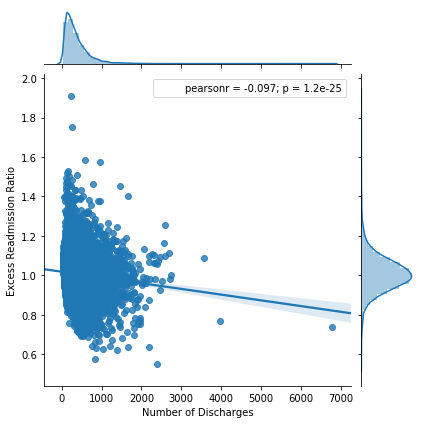

In [33]:
import seaborn as sns 
sns.jointplot(data['Number of Discharges'], data["Excess Readmission Ratio"], kind='reg') 